# Fältanalys

![](pcb.png)

## Metod
För att lösa denna uppgiften kommer vi numeriskt lösa laplace ekvationen

In [47]:
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt

In [63]:
#Här definerar vi rutnätet och alla detaljer på kretskortet

Nx = 32
Ny = 38
V = np.zeros((Nx,Ny))

print(V.shape)
    
def rand(V,Nx,Ny):
    V[0,:] = -10
    V[Nx-1,:] = 5
    V[:,0] = 0
    V[:,Ny-1] = 0

def komp(V):
    #A
    V[0:10, 27:28] = -10
    V[10:19, 23:32] = -10
    #B
    V[22:32, 10:11] = 5
    V[13:22, 6:15] = 5
    
rand(V,Nx,Ny)
komp(V)

(32, 38)


(32, 38) (32, 38)


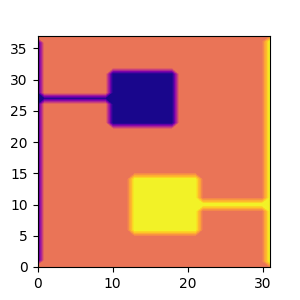

In [64]:
X, Y = np.meshgrid(np.arange(Ny), np.arange(Nx))
print(X.shape, Y.shape)
fig, ax = plt.subplots(figsize=(3,3))
ax.contourf(Y, X, V, 30, cmap='plasma')

In [71]:
#Här använder vi fyrpunktsformeln för att iterativt lösa laplace ekvationen

count = 0
while True:
    V_old = V.copy()
    for x in range(1,Nx-1) :
        for y in range(1,Ny-1) :
            V[x,y] = ( V[x-1,y] + V[x,y-1] + V[x,y+1] + V[x+1,y] )/4
    komp(V)
    rand(V,Nx,Ny)
    
    count += 1

    if abs(V_old-V).mean() < (10**-8) and count > 100:
        break

print(count)

(Ex, Ey) = np.gradient(-V)
Emag = np.sqrt(Ex**2 + Ey**2)


142


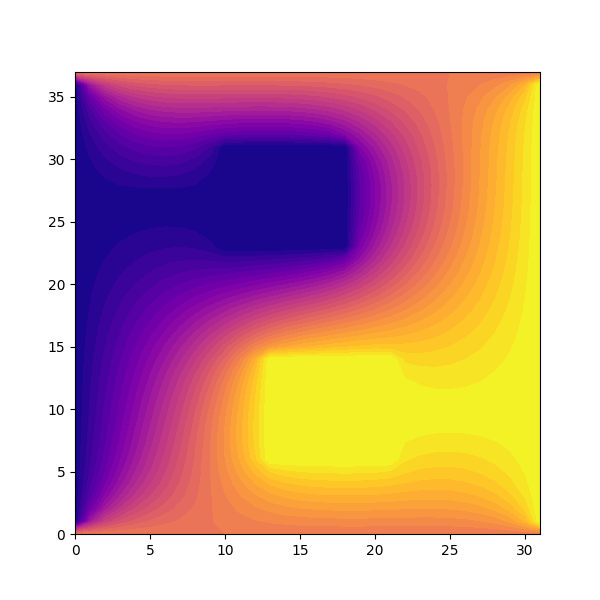

In [72]:
#Här ritar vi potentialen
X, Y = np.meshgrid(np.arange(Ny), np.arange(Nx))
fig, ax = plt.subplots(figsize=(6,6))
ax.contourf(Y, X, V, 30, cmap='plasma')

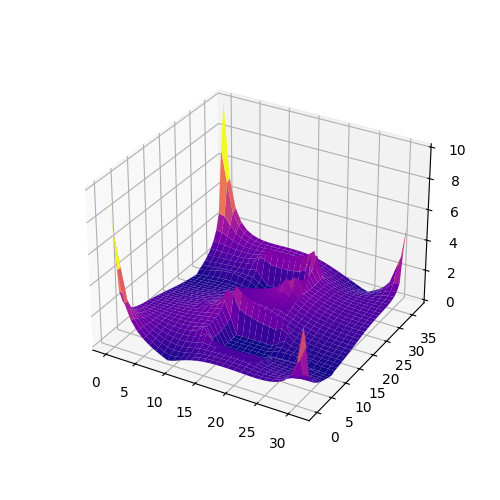

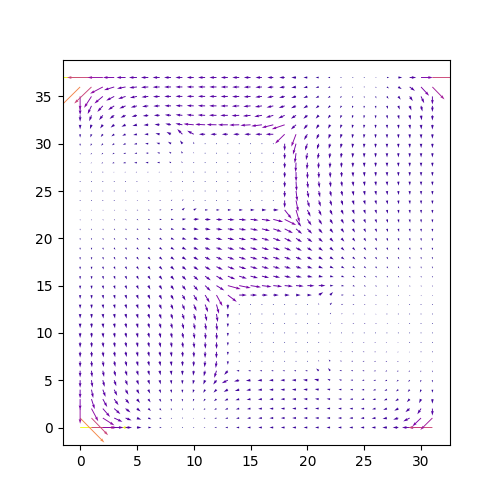

In [73]:
#Här ritar vi fältbilden
# fält styrka 
fig2, ax2 = plt.subplots(figsize=(5,5),subplot_kw=dict(projection='3d'))
ax2.plot_surface(Y, X, Emag, cmap='plasma')

# fält linjer med quiver
fig3, ax3 = plt.subplots(figsize = (5,5))
ax3.quiver(Y, X, Ey, Ex, Emag, scale=80, cmap='plasma')

Potentialen i mitten är -3.321524034717824 V och fältstyrkan är ...


/tmp/ipykernel_3945/2680744188.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


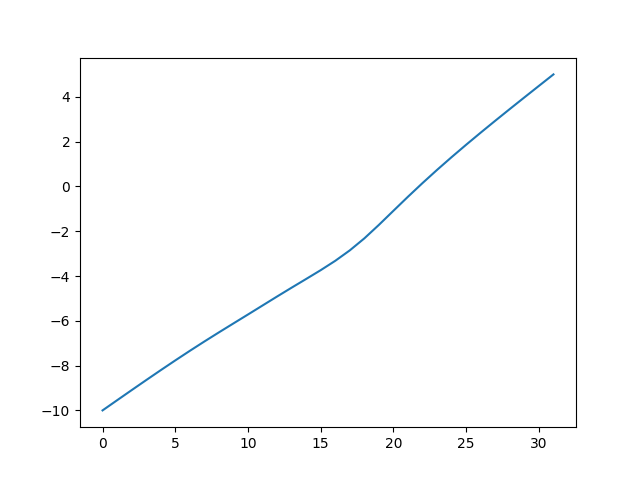

In [74]:
#Här ritar vi fältet och potentialen längs den efterfrågade mittlinjen
mittlinje = V[0:, 19]
x = np.arange(0,32)

print(f'Potentialen i mitten är {mittlinje[16]} V och fältstyrkan är ...')

fig, ax = plt.subplots()
ax.plot(x,mittlinje)

## Resultat